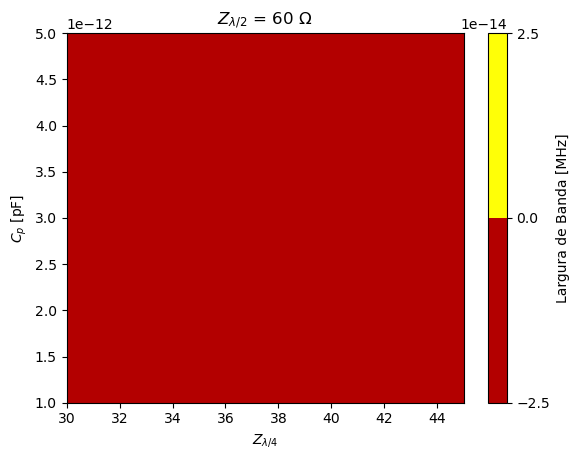

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp2d
import numpy as np
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

#x=Cp
#y=Zlamb/4
#y2=Zlamb/2
#R=chain impedance
#Ic=corrente crítica JJ
#wt=freq do CPW de modelo
#wp=freq detuning
#phi0= quantum flux
#omega_p=transmon freq


#dados geradores
X = np.linspace(30, 45, 1000)
Y = np.linspace(1,5,1000) * (10**(-12))
#f = np.linspace(5.4,5.6,1000) *(10**9)
x, y = np.meshgrid(X, Y)
y = np.flip(y)
#x=30
#y=3 * 10**(-12)

#omg=(0.01*(10**9))
wt=(6.8 * 10**(9)) #Hz
omegap= (6.85 * 10**9) #varia de 5-7.25 GHz
R=50 #ohms
y2=60 #Ohms
phi0=2.06783*(10**(-15))
Ic=3.6*(10**(-6))
#wp=2 * wt
#omegap=np.sqrt((2 * (np.pi) * Ic)/(phi0 * y))



#k0=R/((x**2)*y) #1.5e10
rl=(x**2)/R
k0=1 / (rl * y)
wd=(omegap-wt)* 2 * (np.pi) #
#beta=0.01
beta= (2 * wd)/((np.sqrt(3)) * (k0))
lamb= (k0 * (1 + (3 * beta**2))**0.5)/(12**0.5)

alpha=((np.pi) /(2*wt)) * ((x * (1-(rl/R))) + (2 * y2 *(1-(rl/y2)**2)))
g1= (((2 * alpha)/(rl * k0)) * ((lamb**2) - (wd**2)))**(-4)
g2= 16 * ((k0 * lamb)**2)
G0= ((g1 * g2) + 1)**(-0.25)
#print(G0)

BW=(k0/2) * G0
BW_MHz=BW * 10**(-6)

BWteste = BW_MHz
BWteste[G0 < 15] = 0
BWteste[BW_MHz < 300]=0
BWteste[BW_MHz > 1200]=0

#gráfico

plt.contourf(x, y, BWteste,cmap='hot')
clb = plt.colorbar()
clb.set_label('Largura de Banda [MHz]', y=0.5, ha='center')
plt.title(r'$Z_{\lambda/2}$ = 60 $\Omega$')

plt.ylabel(r'$C_p$ [pF]')
plt.xlabel(r'$Z_{\lambda/4}$')

plt.show()